<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

In [1]:
#Importar os pacotes necessários. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Configurar o notebook.
sns.set_style()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [3]:
#Conjunto de teste geralmente é em torno de 20%/30% do conjunto total, cada caso é um caso, é preciso avaliar.

#Como dividir o conjuto de dados.
! pip install sklearn
from sklearn.model_selection import train_test_split


In [0]:
#Variável alvo neste caso é o sale privce. 
#eliminar a coluna axis=1 SalePrice
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [0]:
#Após o split são geradas 4 variáveis. Se não for especificado em test_size=0.2 é gerada uma amostra de 25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [6]:
X_test.shape

(268, 1)

In [7]:
X_train.shape

(1070, 1)

#Modelos de Machine Learning







###Regressão Linear Simples.

In [8]:
#Dataset com apenas uma variável para simplificar os estudos.
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


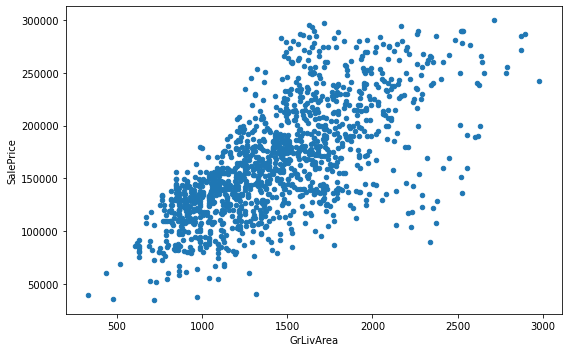

In [9]:
#plotar o gráfico de dispersão.
fog, ax = plt.subplots(figsize= (8,5))
df.plot.scatter(x = "GrLivArea", y= "SalePrice", ax=ax)
plt.tight_layout();

####Regressao Linear Simples com o *scikit-learn*

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [11]:
#Separar a variável dependente (SalePrice) da nossa feature, 
#e usar a função train_test_split para fazer a divisãp entre os dados de treino e teste.

#determinar X e y ...mas atenção com 1-feature (reshape) - variável x (array com 2 dimensões) e y (array com uma dimensão).
X = df["GrLivArea"]
y = df["SalePrice"]

#dividir o dataset entre treino e teste
X_test, X_train, y_test, y_train = train_test_split(X, y)

#criar e treinar um modelo de Regressão Linear

rls_model = LinearRegression()
rls_model.fit(X_train, y_train)

ValueError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do sklearn.pipeline do pacote. Ela acontece porque passamos apenas uma variável (feature) na variável X. Veja esta parte da mensagem do erro:
...if your data has a single feature or array.reshape(1, -1)
Uma coisa que você deve se lembrar é que o scikit-learn espera duas coisas nesta etapa:
Que a variável X seja sempre um np.array com duas dimensões
Que a variável y seja sempre um np.array com uma dimensão
Olhe os prints abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [12]:
# \t signifoca dar ums espaço com tab
print("df:\t\t", df.shape)
print("X:\t\t", X.shape)
print("X (reshape):\t",X.values.reshape(-1,1).shape)
print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Isso é fácil de resolver. Quando for preciso mudar a dimensão de um array para atender a condição acima, use .reshape(-1,1).


In [13]:
#Separar a variável dependente (SalePrice) da nossa feature, 
#e usar a função train_test_split para fazer a divisãp entre os dados de treino e teste.

#determinar X e y ...mas atenção com 1-feature (reshape) - variável x (array com 2 dimensões) e y (array com uma dimensão).

#TRANSFORMANDO X EM UMA MATRIX BIDIMENSIONAL (ARRAY)
X = df["GrLivArea"].values.reshape(-1,1)
y = df["SalePrice"]

#dividir o dataset entre treino e teste
X_test, X_train, y_test, y_train = train_test_split(X, y)

#criar e treinar um modelo de Regressão Linear

rls_model = LinearRegression()
rls_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# imprimir os coeficientes
print("Coeficiente:\t", rls_model.coef_)
print("Intercepto:\t", rls_model.intercept_)

Coeficiente:	 [80.13663595]
Intercepto:	 47933.58687682432


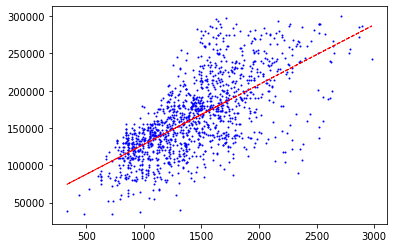

In [15]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
#Equação da reta do modelio
ax.plot(X, (rls_model.coef_ * X + rls_model.intercept_), '--r', linewidth=1)

In [0]:
# previsões em cima do dataset de teste
y_pred = rls_model.predict(X_test)

In [17]:
#valores de predição.
y_pred

array([138568.1221334 , 186169.28388618, 151630.39379283, ...,
       111401.80254721, 117171.64033543, 210931.50439395])

In [18]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.4452560854322072
MAE:		 29637.22653428907
MSE:		 1501341467.2497766


###Regressão Linear Múltipla.

In [0]:
#importar as bibliotecas
! pip install pandas -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
#configurar o notebook
sns.set_style()

#importar o dataframe 
df2 = pd.read_csv("http://dl.dropboxusercontent.com/s/gc1rm540g4i670n/precificacao_housing_plus.csv?dl=0")

#ver as primeiras entradas
print("Tamanho de df2:{}\n".format(df2.shape))

df2.drop("Id", axis=1, inplace=True)
df2.head()

Tamanho de df2:(1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [0]:
#determinar x e y ... mas atenção com 1-feature (reshape)
X = df2.drop("SalePrice", axis=1)
Y = df2["SalePrice"]

#dividir o dataset entre treino e teste 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y)

In [22]:
#criar e treinar um modelo de Regressão Linear
rlm_model = LinearRegression()
rlm_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("df:\t\t",df2.shape)
print("X:\t\t",X.shape)
print("Y:\t\t",Y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
Y:		 (1460,)


In [24]:
#imprimir os coeficientes 
print("Coeficiente:\t", rlm_model.coef_)
print("Intercepto:\t", rlm_model.intercept_)

Coeficiente:	 [-1.58106376e+02  4.30429355e-01  1.66528888e+04  4.37128783e+03
  3.43372087e+02  1.48373307e+02  1.13735217e+01 -4.66480788e+00
  3.00106792e+00  9.70978174e+00  1.54518625e+01  1.24114178e+01
  3.02405497e+00  3.08873352e+01  1.10268146e+04  4.93777601e+03
  5.65408721e+03  1.08900497e+03 -1.22994013e+04 -1.56518035e+04
  7.38865443e+03  3.37968984e+03  8.80537839e+03  9.84633532e+00
  2.07365790e+01  3.80029643e+00  3.34171414e+01  5.30396764e+01
  7.31668006e+01 -2.10814940e+02 -1.07620575e+00 -1.44667210e+01
 -5.58427771e+02]
Intercepto:	 87258.89412559132


In [25]:
# previsões em cima do dataset de teste
Y_pred = rlm_model.predict(X_test)

# verificar desempenho do modelo
print("R2 Score:\t", r2_score(Y_test, Y_pred))
print("MAE:\t\t", mean_absolute_error(Y_test, Y_pred))
print("MSE:\t\t", mean_squared_error(Y_test, Y_pred))

R2 Score:	 0.734237513949708
MAE:		 22980.60481515318
MSE:		 1774714560.9494736


##Regressão Logística

In [19]:
#Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Configurar o notebook
sns.set_style()

#Importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")

#Ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()

Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
#Importat o scikit-learn para criar o modelo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
#Determinar X ey
X = df.drop("num", axis=1)
y = df["num"]

#Dividir o Dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Criar e treinar um modelo de Regressão Linear
ml_model = LogisticRegression(C=0.01)
ml_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Previsão e probabilidade em cima do dataset de test
y_pred = ml_model.predict(X_test)
y_prob = ml_model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_prob: \n", y_prob[0:5])

y_pred: 
 [1 0 0 0 1]

y_prob: 
 [[0.09427375 0.90572625]
 [0.74591661 0.25408339]
 [0.77631174 0.22368826]
 [0.74945384 0.25054616]
 [0.1520096  0.8479904 ]]


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.81      0.74      0.77        34

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



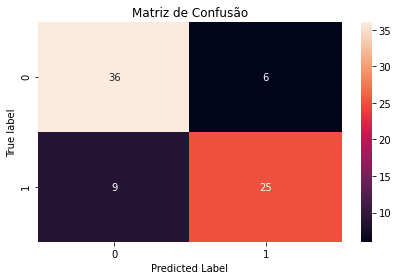

In [24]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

##Decision Tree

In [25]:
#Ideal para problemas de classificação

#Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#configurar notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head(10)

Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [0]:
#importar scikit-learn para criar o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
# determinar X e y
X = df.drop('num', axis=1)
y = df['num']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# criar e treinar um modelo de Regressão Linear
dt_model = DecisionTreeClassifier(max_depth=6, criterion="entropy")
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
#previsões e probabilidades em cima do dataser de teste
y_pred = dt_model.predict(X_test)

#ver a performance do algoritmo
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8157894736842105


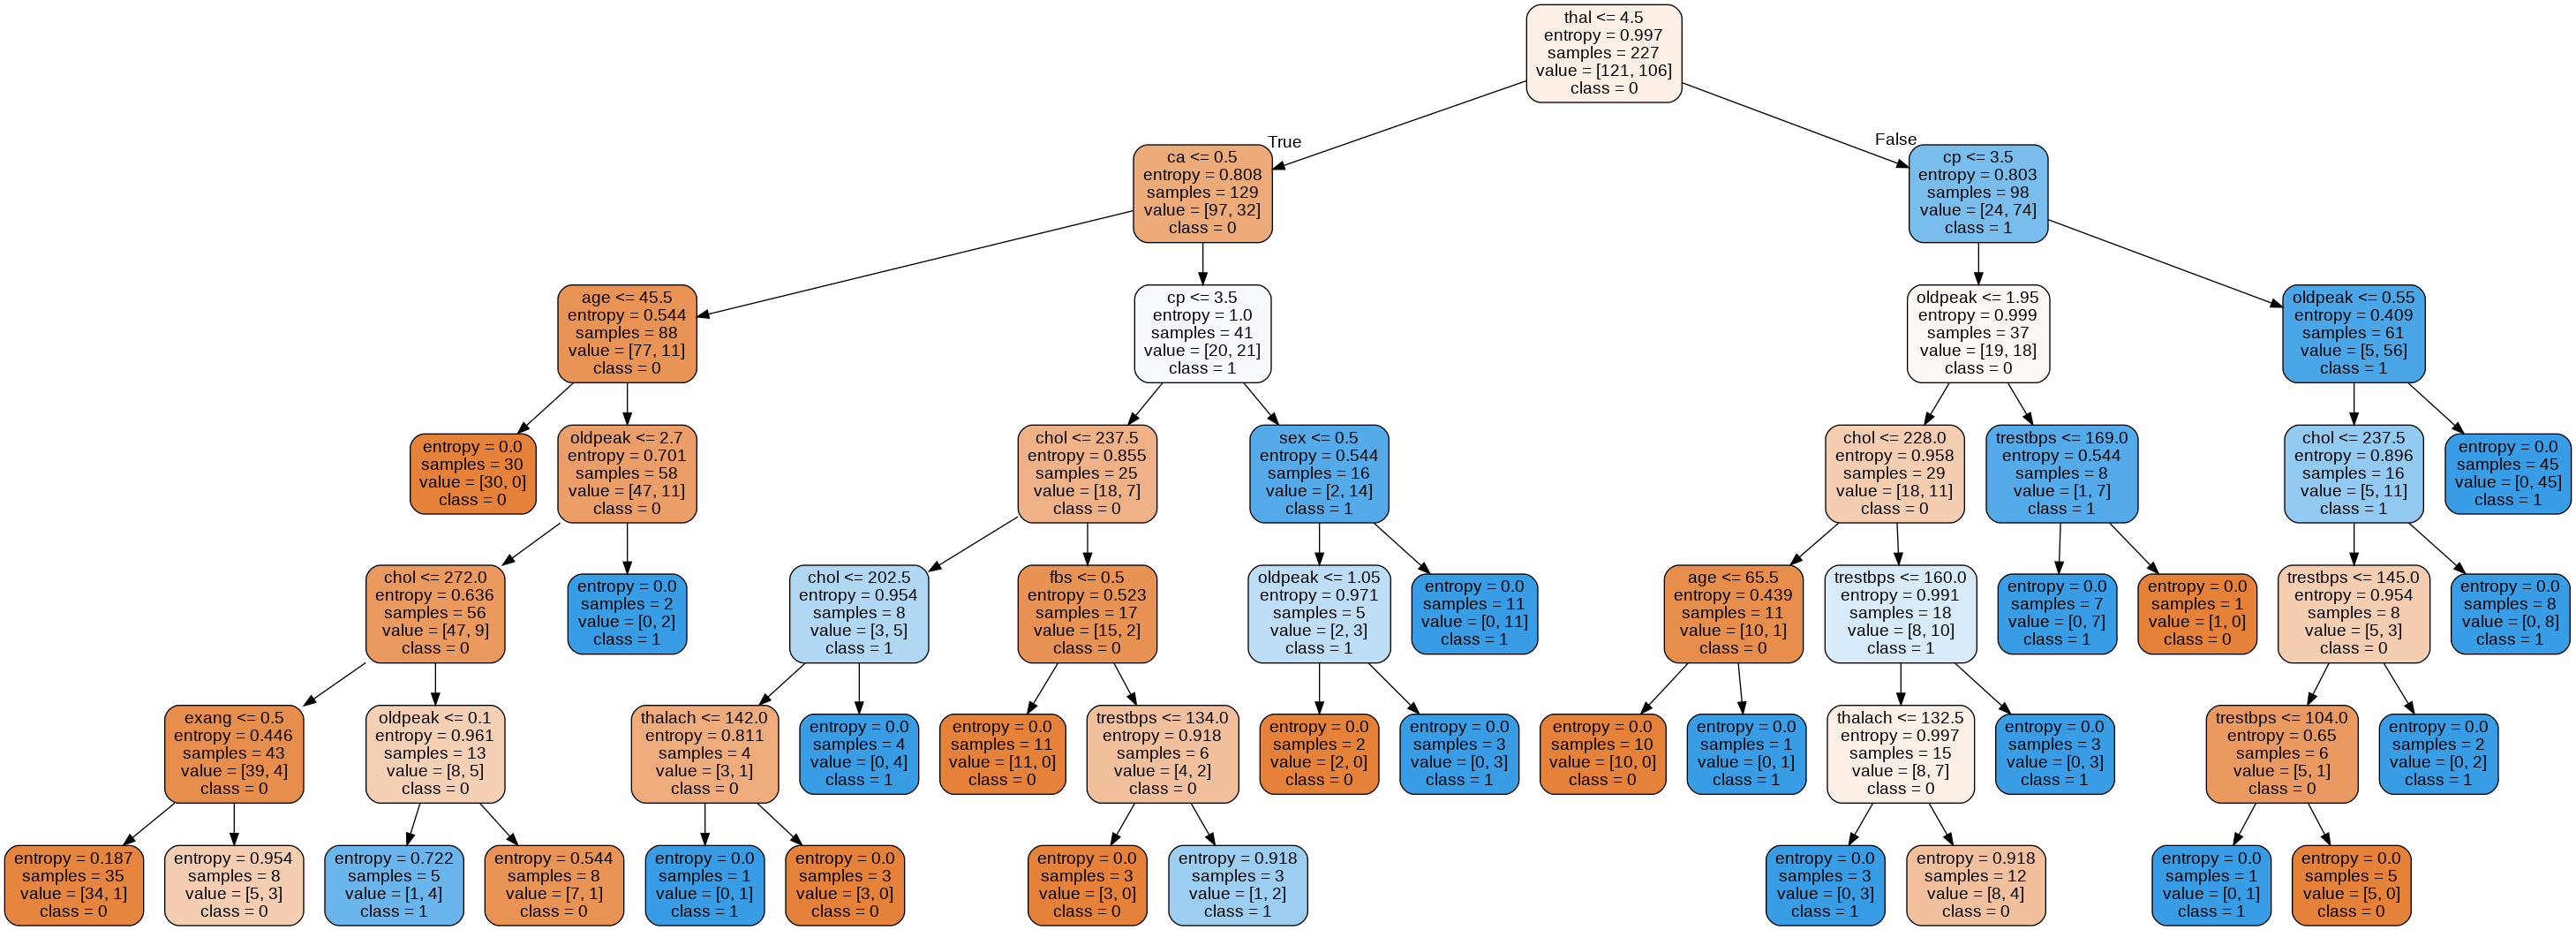

In [57]:
#importar bibliotecas 
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

#criar DOT
dot = export_graphviz(dt_model, filled=True, rounded=True,
                      feature_names = X.columns, class_names=['0', '1'])

#plotar
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

##XGBoost

In [59]:
#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#configurar o notebook
sns.set_style()

#importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0")

#ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()



Tamanho de df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [62]:
#determinar os valores de X e y
X = df.drop("num", axis=1)
y = df["num"]

#dividir o dataset entre treino e test
X_train, X_test, y_train, y_test = train_test_split(X,y)

#criar e treinar um modelo de Regressão Linear
ml_model = XGBClassifier(learning_rate = 0.05, n_estimators = 100,
                         max_depth =4, subsample =0.9,
                         colsample_butree = 0.1, gamma = 1,
                         random_state = 42)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_butree=0.1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=1, learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [63]:
#previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

#ver performance do algoritmo
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))




Accuracy Score:
0.8026315789473685
